In [1]:
import sys
sys.path.append("..")  # <-  This should point to the root directory of the project relative to this file

from scripts import database

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
sample_number = 1000

In [6]:
flights_query =  f"""
                SELECT * FROM flights ORDER BY RANDOM() LIMIT '{sample_number}';
                """

flights = database.query(flights_query)

In [7]:
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-03-03,AA,AA_CODESHARE,AA,5276,OH,N261PS,5276,11278,DCA,...,437.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2019-06-03,UA,UA_CODESHARE,UA,4838,ZW,N450AW,4838,13930,ORD,...,763.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-06-09,UA,UA,UA,657,UA,N1902U,657,12953,LGA,...,1416.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-04-10,AA,AA_CODESHARE,AA,3408,MQ,N240NN,3408,13930,ORD,...,315.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2019-10-16,G4,G4,G4,833,G4,234NV,833,12223,HTS,...,721.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [30]:
DelayDate = flights[["fl_date","arr_delay"]]

In [32]:
DelayDate = DelayDate.fillna(0)

In [33]:
DelayDate = DelayDate.assign(month = pd.DatetimeIndex(DelayDate['fl_date']).month)

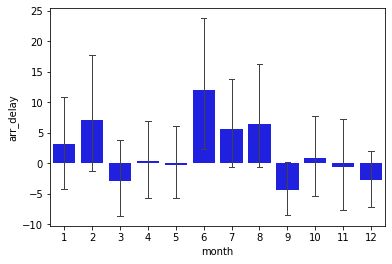

In [34]:
sns.barplot(x=DelayDate.month,y=DelayDate.arr_delay, color='blue', capsize = 0.2, errwidth = 1)
plt.show()

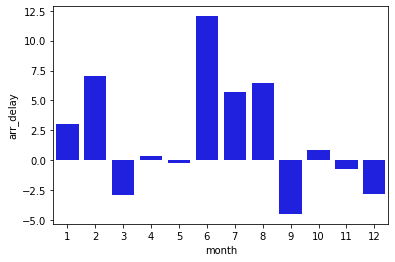

In [37]:
DelayMonth = DelayDate.groupby(by='month').mean().reset_index()
sns.barplot(x=DelayMonth.month, y= DelayMonth.arr_delay, color ='blue')
plt.show()

<AxesSubplot:xlabel='month', ylabel='arr_delay'>

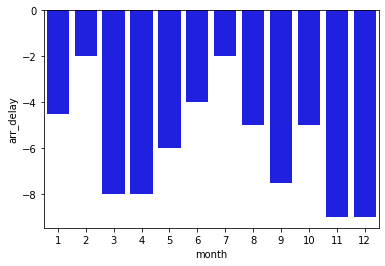

In [36]:
DelayMonth = DelayDate.groupby(by='month').median().reset_index()
sns.barplot(x=DelayMonth.month, y= DelayMonth.arr_delay, color ='blue')